## Unsupervised Learning

Datapoints are clustered so that we get an estimation for classes?

#### Loading libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

#### Loading dataset

In [2]:
iris = datasets.load_iris ()
X, Y = iris['data'][:, 0], iris['data'][:, 1]
print (X.shape, Y.shape)

(150,) (150,)


#### Plotting

Sepal lenght (cm) v/s Sepal width (cm)

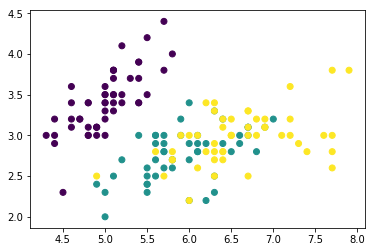

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter (X, Y, c = iris['target'])
plt.show ()

#### Using KMeans algorithm

Fitting datamodel on 2 features

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


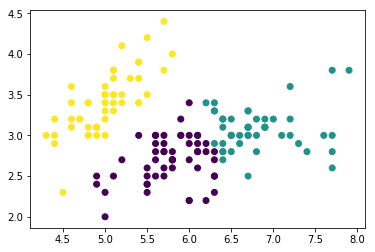

In [4]:
from sklearn.cluster import KMeans

data = iris['data'][:, :2]

model = KMeans (n_clusters = 3)

model.fit (data)

labels = model.predict (data)

print (labels)
plt.scatter (X, Y, c = labels)
plt.show ()

**Using KMeans**

Fitting datamodel on 4 features

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


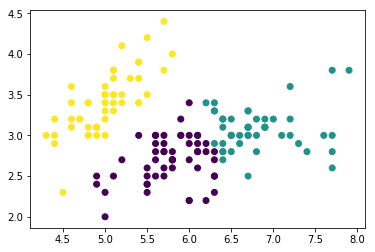

In [5]:
new_data = iris['data'][:, :4]

model = KMeans (n_clusters = 3)

model.fit (data)

labels = model.predict (data)

print (labels)
plt.scatter (X, Y, c = labels)
plt.show ()

### Evaluating clusters when classes are known

In [6]:
from pprint import pprint

species = iris['target_names'][iris['target']]
pprint (species)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [7]:
df = pd.DataFrame ({'species': species, 'labels': labels})

print (model.inertia_)

pd.crosstab (df['species'], df['labels'])

37.1237021277


labels,0,1,2
species,,,
setosa,0,0,50
versicolor,38,12,0
virginica,15,35,0


*What is inertia?*

### Evaluating clusters when classes not known

Keep make clusters untill optimal inertia is achieved.

In [8]:
n_clusters = np.arange (1, 11)

inertias = []

for i in n_clusters:
    model = KMeans (n_clusters = i)
    model.fit (new_data)
    inertias.append (model.inertia_)
    
for num, inertia in zip (n_clusters, inertias):
    print (num, inertia)

1 680.8244
2 152.368706477
3 78.9408414261
4 57.3178732143
5 46.5355820513
6 38.9570111571
7 34.2999855438
8 30.035113115
9 27.8410735931
10 26.3892313315


**Plotting inertia**

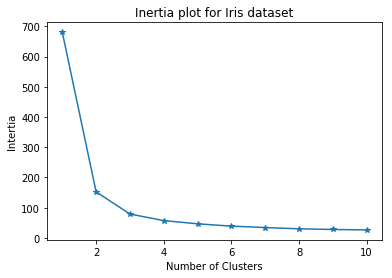

In [9]:
plt.plot (n_clusters, inertias, '-*')
plt.xlabel ('Number of Clusters')
plt.ylabel ('Intertia')
plt.title ('Inertia plot for Iris dataset')
plt.show ()

### Data Transformation

Standardizing the data to get better clusters

In [10]:
# working on wine.csv

file_path = r'C:\Users\student\Documents\Python Scripts\datasets\wine.csv'
wine = pd.read_csv (file_path)

print (wine['class_name'].unique ())
wine.head ()

['Barolo' 'Grignolino' 'Barbera']


,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
X = wine.iloc[:, 2:].values
print (type (X))

model = KMeans (n_clusters = 3)
model.fit (X)

labels = model.predict (X)
print (labels)

<class 'numpy.ndarray'>
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [12]:
names = wine['class_name'].tolist ()

df = pd.DataFrame ({'names': names, 'labels': labels})

pd.crosstab (df['names'], df['labels'])

labels,0,1,2
names,,,
Barbera,29,0,19
Barolo,13,46,0
Grignolino,20,1,50


In [13]:
# finding variance in data
wine.var ()

class_label                 0.600679
alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler ()

wine_scaled = scale.fit_transform (X)

new_model = KMeans (n_clusters = 3) 
new_model.fit (wine_scaled)
labels = new_model.predict (wine_scaled)

new_df = pd.DataFrame ({'names': names, 'labels': labels})
pd.crosstab (new_df['names'], new_df['labels'])

labels,0,1,2
names,,,
Barbera,0,48,0
Barolo,59,0,0
Grignolino,3,3,65


### Assignment

1. Play with Grains data and see if you can make clusters without scaling and with scaling
2. Play with stocks data and see what happens without scaling, with scaling and does only scaling helps ?